In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
hdr_folder = "HDR"

image_filenames = [
    "StLouisArchMultExpCDR.jpg",
    "StLouisArchMultExpEV+1.51.jpg",
    "StLouisArchMultExpEV+4.09.jpg",
    "StLouisArchMultExpEV-1.82.jpg",
    "StLouisArchMultExpEV-4.72.jpg"
]



In [10]:
def load_images_from_folder(folder, filenames):
    loaded_images = []
    loaded_paths = []
    print(f"Attempting to read images from folder: {folder}")
    if not os.path.isdir(folder):
        print(f"Error: Folder '{folder}' not found.")
        return [], []
        
    for filename in filenames:
        path = os.path.join(folder, filename)
        if os.path.exists(path):
            img = cv2.imread(path)
            if img is not None:
                loaded_images.append(img.astype(np.float32))
                loaded_paths.append(path)
                print(f"Loaded {os.path.basename(path)}, shape: {img.shape}, dtype: {loaded_images[-1].dtype}")
            else:
                print(f"Error reading image: {path}")
        else:
            print(f"Image '{path}' not found.")
    
    if not loaded_images:
        print("Error in reading images.")
    return loaded_images, loaded_paths

In [11]:
images = []
loaded_image_paths = []

if os.path.isdir(hdr_folder): 
    images, loaded_image_paths = load_images_from_folder(hdr_folder, image_filenames)


if not images:
    print("\nError in reading image")
else:
    if len(images) < len(image_filenames):
        print(f"\nNote: Successfully loaded {len(images)} image(s) out of {len(image_filenames)} specified.")
    else:
        print(f"\nSuccessfully loaded all {len(images)} images.")

Attempting to read images from folder: HDR
Loaded StLouisArchMultExpCDR.jpg, shape: (2112, 2816, 3), dtype: float32
Loaded StLouisArchMultExpEV+1.51.jpg, shape: (2112, 2816, 3), dtype: float32
Loaded StLouisArchMultExpEV+4.09.jpg, shape: (2112, 2816, 3), dtype: float32
Loaded StLouisArchMultExpEV-1.82.jpg, shape: (2112, 2816, 3), dtype: float32
Loaded StLouisArchMultExpEV-4.72.jpg, shape: (2112, 2816, 3), dtype: float32

Successfully loaded all 5 images.


In [12]:
average_image_uint8 = None 

if images: 
    print("\nCalculating the sum and average of the images...")

    first_shape = images[0].shape
    consistent_shapes = True
    for i, img in enumerate(images[1:], 1):
        if img.shape != first_shape:
            print(f"Error: Image {os.path.basename(loaded_image_paths[i])} has shape {img.shape}, expected {first_shape}.")
            consistent_shapes = False
            break
    
    if consistent_shapes:
        sum_image = np.zeros_like(images[0], dtype=np.float32)
        for img in images:
            sum_image += img
        
        average_image_float = sum_image / len(images)
        
        average_image_uint8 = np.clip(average_image_float, 0, 255).astype(np.uint8)
        
        print("Summation and averaging complete.")
        print(f"Resulting averaged image dtype: {average_image_uint8.dtype}, shape: {average_image_uint8.shape}")
    else:
        print("Cannot proceed with averaging due to inconsistent image shapes among loaded images.")
   


Calculating the sum and average of the images...
Summation and averaging complete.
Resulting averaged image dtype: uint8, shape: (2112, 2816, 3)



Displaying images...


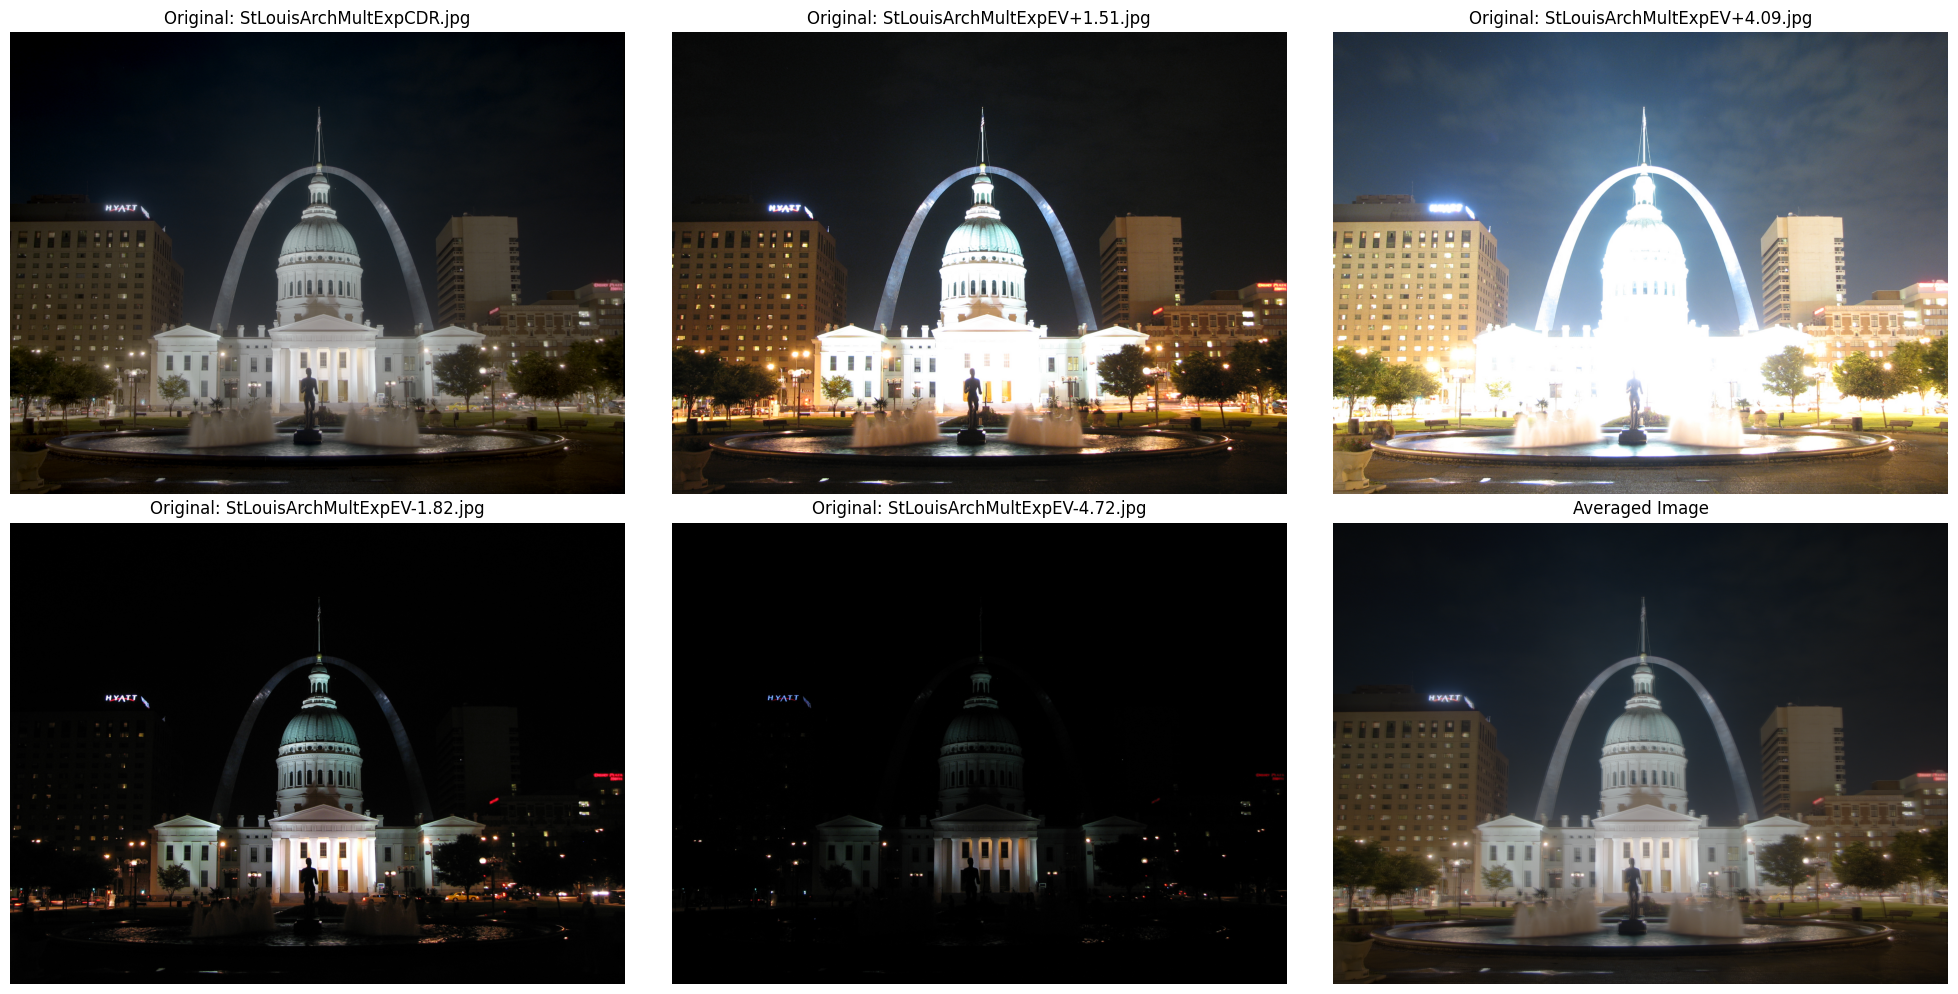

In [15]:

if images: 
    print("\nDisplaying images...")
    
    num_originals = len(images)
    display_average = average_image_uint8 is not None 
    
    total_plots = num_originals + (1 if display_average else 0)
    
    if total_plots > 0:
        plt.figure(figsize=(20, 10 if num_originals > 2 else 6 )) 
        
        if total_plots <= 1:
            plot_rows, plot_cols = 1,1
        elif total_plots <= 4:
            plot_rows = 1
            plot_cols = total_plots
        elif total_plots <= 6: 
            plot_rows = 2
            plot_cols = 3 
        else: 
            plot_cols = 4 
            plot_rows = (total_plots + plot_cols - 1) // plot_cols

        for i, img_float in enumerate(images):
            plt.subplot(plot_rows, plot_cols, i + 1)
            img_display = np.clip(img_float, 0, 255).astype(np.uint8)
            plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
            plt.title(f"Original: {os.path.basename(loaded_image_paths[i])}")
            plt.axis('off')

        if display_average:
            plt.subplot(plot_rows, plot_cols, num_originals + 1)
            plt.imshow(cv2.cvtColor(average_image_uint8, cv2.COLOR_BGR2RGB))
            plt.title("Averaged Image")
            plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("No images to display.")
        

In [ ]:
if average_image_uint8 is not None:
    output_filename = "StLouisArch_Averaged.png"
    try:
        cv2.imwrite(output_filename, average_image_uint8)
        print(f"\nAveraged image saved as {output_filename}")
    except Exception as e:
        print(f"Error saving image {output_filename}: {e}")


Averaged image saved as StLouisArch_Averaged.png
